<a href="https://colab.research.google.com/github/Chandu9391/Data-science-codes/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('/content/AirPassengers.csv',index_col='Month',skiprows=1,parse_dates=True,names=['Month','Passengers'])

In [131]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [133]:
df.index.freq = 'MS'

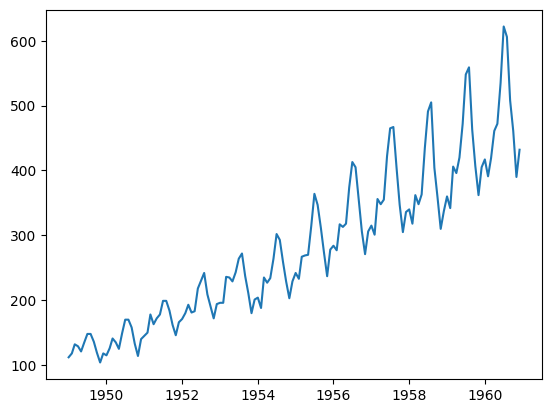

In [134]:
plt.plot(df)
plt.show()

In [135]:
from statsmodels.tsa.seasonal import STL,seasonal_decompose

In [136]:
res = STL(df).fit()

[]

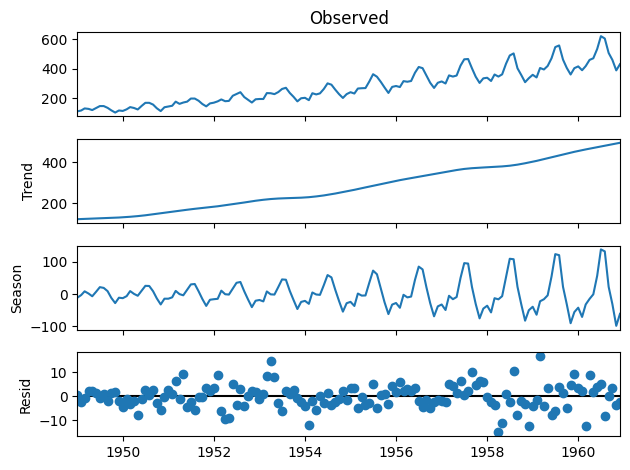

In [137]:
res.plot()
plt.plot()

Train Test Split

In [138]:
train_lenght = int(len(df)*0.75)
train_lenght

108

In [139]:
test_length = int(len(df) - train_lenght)
test_length

36

In [140]:
train_data = df.iloc[:train_lenght]
#train_data

In [141]:
test_data = df.iloc[train_lenght:]
#test_data

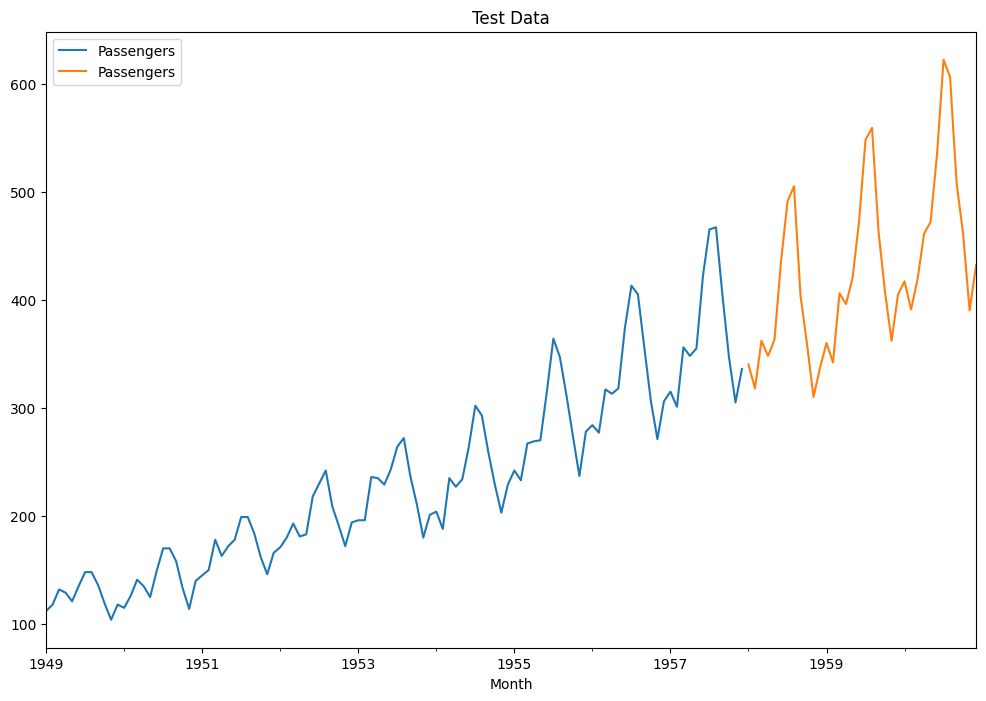

In [142]:
train_data['Passengers'].plot(figsize=(12,8),title='Train Data',legend=True)
test_data['Passengers'].plot(figsize=(12,8),title='Test Data',legend=True)
plt.show()

Fitting the model

In [143]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,ExponentialSmoothing

In [144]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(smoothing_level=0.2)

In [145]:
test_results = test_data.copy()

In [146]:
ses_model.forecast(test_length)

,0
1958-01-01,362.803041
1958-02-01,362.803041
1958-03-01,362.803041
1958-04-01,362.803041
1958-05-01,362.803041
1958-06-01,362.803041
1958-07-01,362.803041
1958-08-01,362.803041
1958-09-01,362.803041
1958-10-01,362.803041


In [147]:
test_results['ses_model'] = ses_model.forecast(test_length)
test_results.head()

,Passengers,ses_model
Month,,
1958-01-01,340,362.803041
1958-02-01,318,362.803041
1958-03-01,362,362.803041
1958-04-01,348,362.803041
1958-05-01,363,362.803041


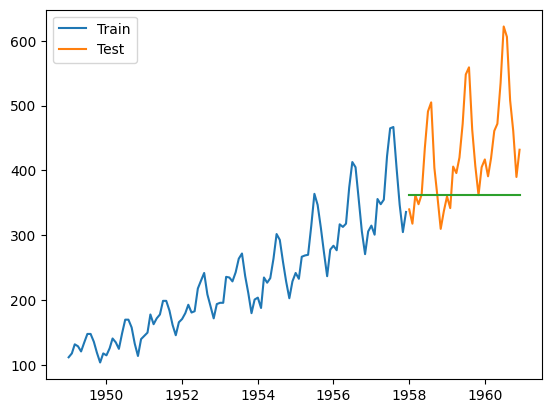

In [148]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(test_results['ses_model'])
plt.legend(loc='best')
plt.show()

In [149]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [150]:
mse = mean_squared_error(test_data['Passengers'],test_results['ses_model'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Passengers'],test_results['ses_model'])
mape = mean_absolute_percentage_error(test_data['Passengers'],test_results['ses_model'])
mse,rmse,mae,mape

(10434.395944166805, 102.1488910569606, 76.25420388757664, 0.15881320545032615)

In [151]:
test_metrics = pd.DataFrame(index=[0],columns=['mse','rmse','mae','mape'],data = [[mse,rmse,mae,mape]])
test_metrics

,mse,rmse,mae,mape
0,10434.395944,102.148891,76.254204,0.158813


Double Exponential Smoothing

In [152]:
desadd_model = ExponentialSmoothing(train_data['Passengers'],trend='add').fit()

In [153]:
test_results['des_add'] = desadd_model.forecast(test_length)
test_results.head()

,Passengers,ses_model,des_add
Month,,,
1958-01-01,340,362.803041,337.916485
1958-02-01,318,362.803041,339.976576
1958-03-01,362,362.803041,342.036666
1958-04-01,348,362.803041,344.096756
1958-05-01,363,362.803041,346.156846


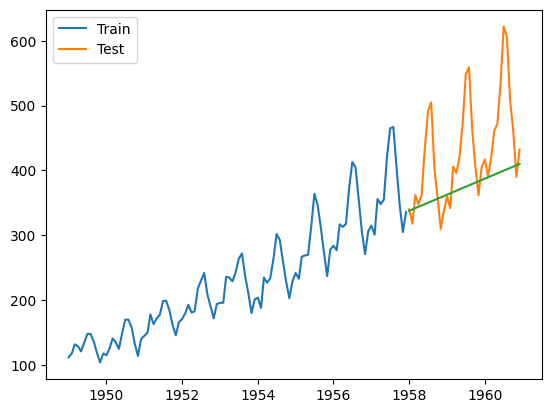

In [155]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(test_results['des_add'])
plt.legend(loc='best')
plt.show()

In [162]:
mse = mean_squared_error(test_data['Passengers'],test_results['des_add'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Passengers'],test_results['des_add'])
mape = mean_absolute_percentage_error(test_data['Passengers'],test_results['des_add'])
mse,rmse,mae,mape

(7791.631326444609, 88.27021766396982, 63.34330706527367, 0.13092368751018746)

In [163]:
test_metrics = pd.DataFrame(index=[0],columns=['mse','rmse','mae','mape'],data = [[mse,rmse,mae,mape]])
test_metrics

,mse,rmse,mae,mape
0,7791.631326,88.270218,63.343307,0.130924


In [157]:
desmul_model = ExponentialSmoothing(train_data['Passengers'],trend='mul').fit()

In [160]:
test_results['des_mul'] = desmul_model.forecast(test_length)
test_results.head()

,Passengers,ses_model,des_add,des_mul
Month,,,,
1958-01-01,340,362.803041,337.916485,341.706530
1958-02-01,318,362.803041,339.976576,347.641683
1958-03-01,362,362.803041,342.036666,353.679925
1958-04-01,348,362.803041,344.096756,359.823046
1958-05-01,363,362.803041,346.156846,366.072868


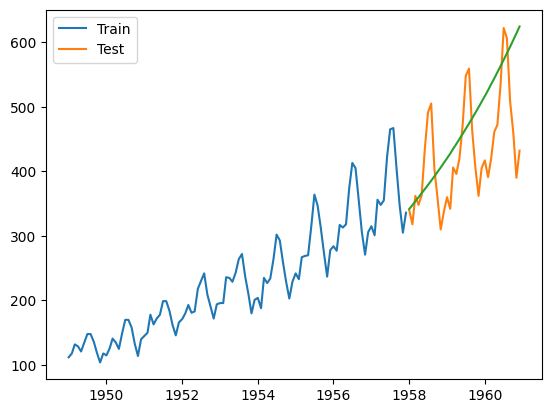

In [161]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(test_results['des_mul'])
plt.legend(loc='best')
plt.show()

In [164]:
mse = mean_squared_error(test_data['Passengers'],test_results['des_mul'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Passengers'],test_results['des_mul'])
mape = mean_absolute_percentage_error(test_data['Passengers'],test_results['des_mul'])
mse,rmse,mae,mape

(7982.134245302871, 89.34279067335467, 72.36052202718292, 0.17253800129271346)

In [165]:
test_metrics = pd.DataFrame(index=[0],columns=['mse','rmse','mae','mape'],data = [[mse,rmse,mae,mape]])
test_metrics

,mse,rmse,mae,mape
0,7982.134245,89.342791,72.360522,0.172538


###Triple Exponential Smoothing

In [166]:
tesadd_model = ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal = 'add').fit()

In [167]:
test_results['tes_add'] = tesadd_model.forecast(test_length)
test_results.head()

,Passengers,ses_model,des_add,des_mul,tes_add
Month,,,,,
1958-01-01,340,362.803041,337.916485,341.706530,357.332353
1958-02-01,318,362.803041,339.976576,347.641683,345.820169
1958-03-01,362,362.803041,342.036666,353.679925,398.634554
1958-04-01,348,362.803041,344.096756,359.823046,390.191995
1958-05-01,363,362.803041,346.156846,366.072868,396.346394


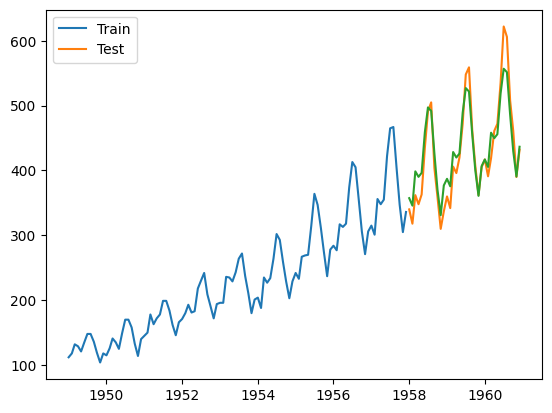

In [168]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(test_results['tes_add'])
plt.legend(loc='best')
plt.show()

In [169]:
mse = mean_squared_error(test_data['Passengers'],test_results['tes_add'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Passengers'],test_results['tes_add'])
mape = mean_absolute_percentage_error(test_data['Passengers'],test_results['tes_add'])
mse,rmse,mae,mape

(695.676378388075, 26.375677780638643, 21.544775457219366, 0.0511419028267833)

In [170]:
tesmul_model = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal = 'mul').fit()

In [174]:
test_results['tes_mul'] = tesmul_model.forecast(test_length)
test_results.head()

,Passengers,ses_model,des_add,des_mul,tes_add,tes_mul
Month,,,,,,
1958-01-01,340,362.803041,337.916485,341.706530,357.332353,356.968658
1958-02-01,318,362.803041,339.976576,347.641683,345.820169,344.588831
1958-03-01,362,362.803041,342.036666,353.679925,398.634554,405.718358
1958-04-01,348,362.803041,344.096756,359.823046,390.191995,400.610839
1958-05-01,363,362.803041,346.156846,366.072868,396.346394,409.001684


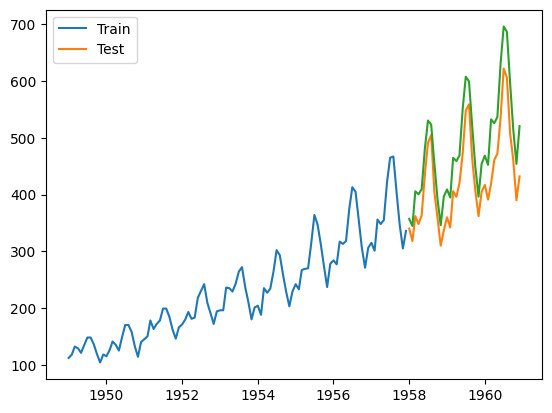

In [178]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(test_results['tes_mul'])
plt.legend(loc='best')
plt.show()

In [176]:
mse = mean_squared_error(test_data['Passengers'],test_results['tes_mul'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Passengers'],test_results['tes_mul'])
mape = mean_absolute_percentage_error(test_data['Passengers'],test_results['tes_mul'])
mse,rmse,mae,mape

(3525.9322806129094, 59.3795611352333, 55.698326986164496, 0.13024866779096858)

###Final model

In [179]:
final_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal = 'mul').fit()

In [180]:
forecast_values = final_model.forecast(test_length)

In [182]:
#forecast_values

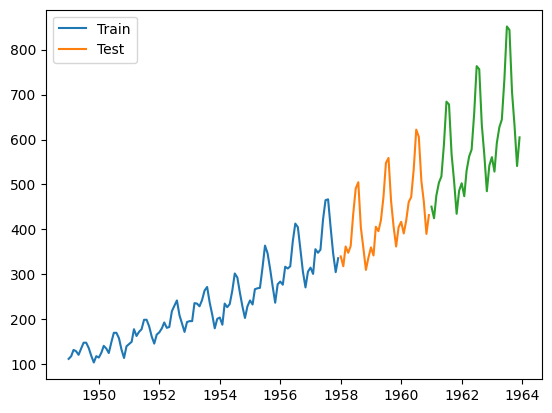

In [184]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(forecast_values)
plt.legend(loc='best')
plt.show()